In [107]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

### TopUniversities.com (QS)


In [5]:
# input: link to the university details page where we can find the detail numbers
# returns an array as follows: [total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students]
def get_details(link):
    link = link + '#wurs'
    r = requests.get(link)
    page_body = r.text

    soup = BeautifulSoup(page_body, 'html.parser')
    
    # will contain total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students
    results = []
    for name in ['total faculty', 'inter faculty', 'total student', 'total inter']:
        try:
            elem = np.int(soup.find('div', class_= name).find('div', class_='number').text.replace(',',''))
        except AttributeError:
            elem = None
        results.append(elem)
    return results

In [6]:
# send a request to get the content of the ranking list
# We found the correct url where to send the request using postman and checking the different requests that were sent
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt')
page_body = r.text
json_data = r.json()
cols = ['QSrank', 'region', 'country', 'Faculty members (total)', 'Faculty members (inter.)', 'Students (total)', 'Students (inter.)']
df_QS = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
# We had to discard one university with the above ranking check. Thus we also take the 201th university to have the actual top-200
for i, uni in enumerate(json_data['data'][:201]):
    soup = BeautifulSoup(uni['uni'], 'html.parser')
    details_link = 'https://www.topuniversities.com' + soup.a['href']
    name = soup.a.string
    country = uni['location']
    region = uni['region']
    rank = np.int(uni['overall_rank'])
    details = get_details(details_link)
    # we saw that for some reason the uni ranked 281 appeared in the top-200.
    # this check avoids having it in our ranking
    if int(rank) <= 201:
        df_QS.loc[name] = ([rank, region, country] + details)
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")
#print("Progression: Done!", end="\r")

In [7]:
#df[pd.isnull(df['Faculty members (inter.)'])]
df_QS.head(5)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.)
Massachusetts Institute of Technology (MIT),1,North America,United States,2982,1679,11067,3717
Stanford University,2,North America,United States,4285,2042,15878,3611
Harvard University,3,North America,United States,4350,1311,22429,5266
California Institute of Technology (Caltech),4,North America,United States,953,350,2255,647
University of Cambridge,5,Europe,United Kingdom,5490,2278,18770,6699


In [91]:
#Top 10 universities with the largest fac members/students ratio
df_QS['Students/Fac members'] = (df_QS['Students (total)']/df_QS['Faculty members (total)']).astype(float)
resultfirstratio = df_QS.sort_values('Students/Fac members' , ascending = True )
resultfirstratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Students/Fac members,International students ratio
California Institute of Technology (Caltech),4,North America,United States,953,350,2255,647,2.366212,0.286918
Yale University,16,North America,United States,4940,1708,12402,2469,2.510526,0.199081
University of Oxford,6,Europe,United Kingdom,6750,2964,19720,7353,2.921481,0.37287
University of Cambridge,5,Europe,United Kingdom,5490,2278,18770,6699,3.418944,0.356899
Johns Hopkins University,17,North America,United States,4462,1061,16146,4105,3.618557,0.254243
Stanford University,2,North America,United States,4285,2042,15878,3611,3.705484,0.227422
Massachusetts Institute of Technology (MIT),1,North America,United States,2982,1679,11067,3717,3.711268,0.335863
University of Rochester,186,North America,United States,2569,488,9636,2805,3.750876,0.291096
University of Pennsylvania,19,North America,United States,5499,1383,20639,4250,3.753228,0.205921
Columbia University,18,North America,United States,6189,913,25045,8105,4.046696,0.323617


In [95]:
#Top 10 universities with the largest international students ratio
df_QS['International students ratio'] = df_QS['Students (inter.)']/df_QS['Students (total)'].astype(float)
resultsecondratio = df_QS.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Students/Fac members,International students ratio
London School of Economics and Political Science (LSE),35,Europe,United Kingdom,1088,687,9760,6748,8.970588,0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),12,Europe,Switzerland,1695,1300,10343,5896,6.102065,0.570047
Imperial College London,8,Europe,United Kingdom,3930,2071,16090,8746,4.094148,0.543567
Maastricht University,200,Europe,Netherlands,1277,502,16385,8234,12.830854,0.502533
Carnegie Mellon University,47,North America,United States,1342,425,13356,6385,9.952310,0.478062
UCL (University College London),7,Europe,United Kingdom,6345,2554,31080,14854,4.898345,0.477928
University of St Andrews,92,Europe,United Kingdom,1140,485,8800,4030,7.719298,0.457955
The University of Melbourne,41,Oceania,Australia,3311,1477,42182,18030,12.739958,0.427434
Queen Mary University of London,127,Europe,United Kingdom,1885,801,16135,6806,8.559682,0.421816
The University of Hong Kong,26,Asia,Hong Kong,3012,2085,20214,8230,6.711155,0.407144


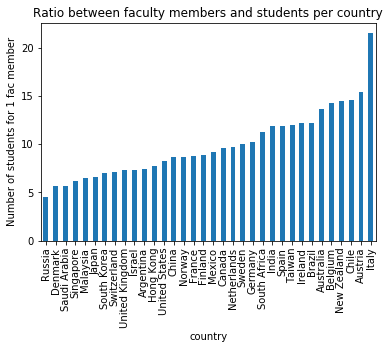

In [12]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_QS.groupby('country')['Faculty members (total)'].sum()
Country_students = df_QS.groupby('country')['Students (total)'].sum()
plt.figure(figsize=[10,10])
Country_students.div(Country_facmembers).sort_values(ascending=True).plot(kind = 'bar')
plt.title('Ratio between faculty members and students per country')
plt.ylabel('Number of students for 1 fac member')

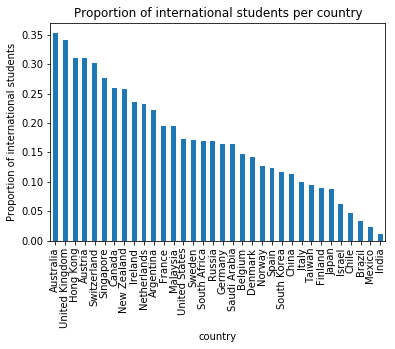

In [13]:
#Compute the ratio of international students per country
Country_intstudents = df_QS.groupby('country')['Students (inter.)'].sum()
plt.figure(figsize=[10,10])
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Proportion of international students per country')
plt.ylabel('Proportion of international students')

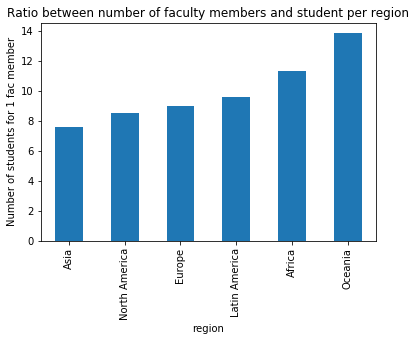

In [14]:
#Compute the ratio between faculty members and students per region
Region_facmembers = df_QS.groupby('region')['Faculty members (total)'].sum()
Region_students = df_QS.groupby('region')['Students (total)'].sum()
Region_students.div(Region_facmembers).sort_values(ascending=True).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and student per region')
plt.ylabel('Number of students for 1 fac member')

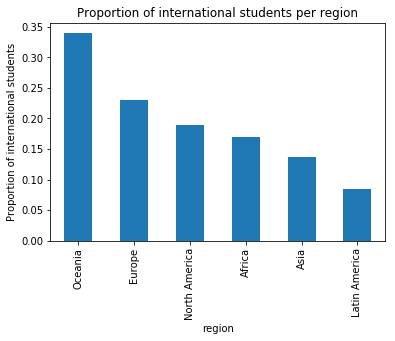

In [15]:
#Compute the ratio of international students per region
Region_intstudents = df_QS.groupby('region')['Students (inter.)'].sum()
Region_intstudents.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Proportion of international students per region')
plt.ylabel('Proportion of international students')

### Times Higher education (TH)


In [44]:
# Make the request
r = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
page_body = r.text
page_body[:800]

soup = BeautifulSoup(page_body, 'html.parser')

In [45]:
json_data = r.json()

In [65]:
cols = ['THrank',  'country', 'Students (total)', 'Students (inter.)','International students ratio', 'Students/Fac members' ,'Faculty members (total)',]
df_TH = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
for i, uni in enumerate(json_data['data'][:200]):
    name = uni['name']
    country = uni['location']
    THrank = np.int((uni['rank'].replace('=','')))
    students_tot = np.int(uni['stats_number_students'].replace(',',''))
    student_int_ratio = np.float(uni['stats_pc_intl_students'][:-1])/100
    student_staff_ratio = np.float(uni['stats_student_staff_ratio'])
    staff_number = np.int(students_tot/student_staff_ratio)
    int_student = np.int(students_tot*student_int_ratio)
    
    df_TH.loc[name] = ([THrank, country, students_tot, int_student, student_int_ratio, student_staff_ratio,staff_number])
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")

    
   

In [35]:
#df_TH.head(10)

The region not being present in the dataframe, we use the link between country and region from the QS dataframe to create the new column.

In [66]:
dico = dict(zip(df_QS['country'].values, df_QS['region'].values))
df_TH['region'] = df_TH['country'].replace(dico)
df_TH['region'].unique()

array(['Europe', 'North America', 'Asia', 'Oceania', 'Africa',
       'Luxembourg', 'Russian Federation'], dtype=object)

Luxembourg and Russian federation are not in the dictionnary, hence it created some mistakes in the new region column. We will set the Luxembourg and Russian federation to Europe

In [67]:
df_TH.loc[df_TH['region']=='Luxembourg', 'region'] = 'Europe'
df_TH.loc[df_TH['region']=='Russian Federation', 'region'] = 'Europe'
#Let's rearrange the columns a bit
df_TH = df_TH[['THrank' , 'region' , 'country' , 'Faculty members (total)' , 'Students (total)' , 'Students (inter.)', 'Students/Fac members' , 'International students ratio' ]]
df_TH.head(10)

,THrank,region,country,Faculty members (total),Students (total),Students (inter.),Students/Fac members,International students ratio
University of Oxford,1,Europe,United Kingdom,1822,20409,7755,11.2,0.38
University of Cambridge,2,Europe,United Kingdom,1687,18389,6436,10.9,0.35
California Institute of Technology,3,North America,United States,339,2209,596,6.5,0.27
Stanford University,3,North America,United States,2112,15845,3485,7.5,0.22
Massachusetts Institute of Technology,5,North America,United States,1284,11177,3800,8.7,0.34
Harvard University,6,North America,United States,2283,20326,5284,8.9,0.26
Princeton University,7,North America,United States,958,7955,1909,8.3,0.24
Imperial College London,8,Europe,United Kingdom,1390,15857,8721,11.4,0.55
University of Chicago,9,North America,United States,2181,13525,3381,6.2,0.25
ETH Zurich – Swiss Federal Institute of Technology Zurich,10,Europe,Switzerland,1317,19233,7308,14.6,0.38


In [68]:
#Top 10 universities with the largest fac members/students ratio
resultfirstratio = df_TH.sort_values('Students/Fac members' , ascending = True )
resultfirstratio.head(10)

,THrank,region,country,Faculty members (total),Students (total),Students (inter.),Students/Fac members,International students ratio
Vanderbilt University,105,North America,United States,3639,12011,1561,3.3,0.13
University of Copenhagen,109,Europe,Denmark,7413,30395,4255,4.1,0.14
Johns Hopkins University,13,North America,United States,3604,15498,3719,4.3,0.24
Yale University,12,North America,United States,2826,12155,2552,4.3,0.21
University of Rochester,153,North America,United States,2240,9636,2794,4.3,0.29
Emory University,98,North America,United States,2874,12649,2403,4.4,0.19
Duke University,17,North America,United States,3390,15256,3356,4.5,0.22
École Polytechnique,115,Europe,France,548,2799,1007,5.1,0.36
Scuola Normale Superiore di Pisa,184,Europe,Italy,99,515,36,5.2,0.07
University of Pittsburgh,100,North America,United States,4468,26367,2636,5.9,0.10


In [69]:
#Top 10 universities with the largest international students ratio
resultsecondratio = df_TH.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,THrank,region,country,Faculty members (total),Students (total),Students (inter.),Students/Fac members,International students ratio
London School of Economics and Political Science,25,Europe,United Kingdom,825,10065,7146,12.2,0.71
University of Luxembourg,179,Europe,Luxembourg,340,4969,2832,14.6,0.57
École Polytechnique Fédérale de Lausanne,38,Europe,Switzerland,886,9928,5460,11.2,0.55
Imperial College London,8,Europe,United Kingdom,1390,15857,8721,11.4,0.55
Maastricht University,103,Europe,Netherlands,929,16727,8363,18.0,0.50
University College London,16,Europe,United Kingdom,2886,30304,14848,10.5,0.49
University of St Andrews,143,Europe,United Kingdom,692,9005,4322,13.0,0.48
Carnegie Mellon University,24,North America,United States,938,12676,5704,13.5,0.45
Queen Mary University of London,121,Europe,United Kingdom,1158,15405,6932,13.3,0.45
University of Hong Kong,40,Asia,Hong Kong,1020,18364,7712,18.0,0.42


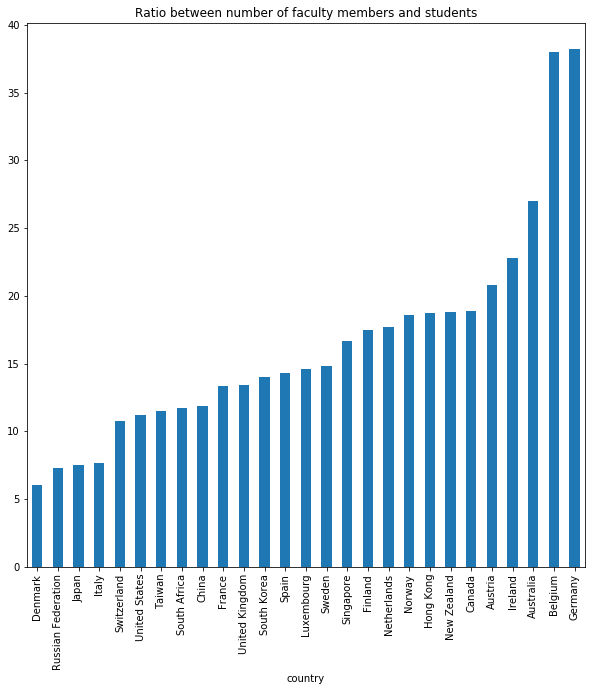

In [70]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_TH.groupby('country')['Faculty members (total)'].sum()
Country_students = df_TH.groupby('country')['Students (total)'].sum()
plt.figure(figsize=[10,10])
Country_students.div(Country_facmembers).sort_values(ascending=True).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and students')

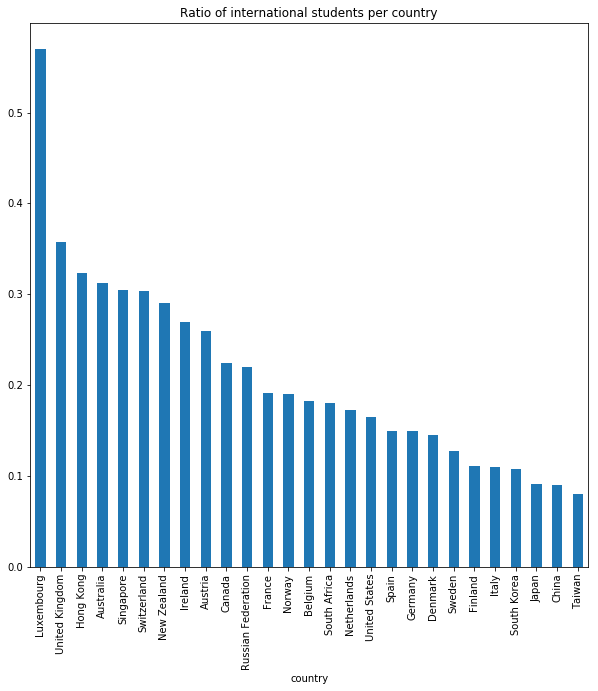

In [71]:
#Compute the ratio of international students per country
Country_intstudents = df_TH.groupby('country')['Students (inter.)'].sum()
plt.figure(figsize=[10,10])
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio of international students per country')

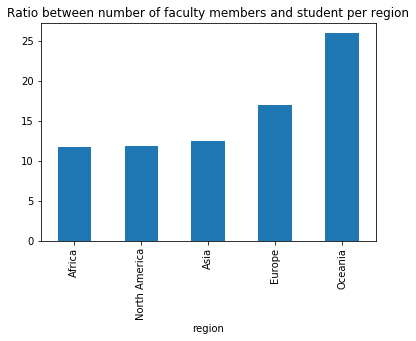

In [72]:
#Compute the ratio between faculty members and students per region
Region_facmembers = df_TH.groupby('region')['Faculty members (total)'].sum()
Region_students = df_TH.groupby('region')['Students (total)'].sum()
Region_students.div(Region_facmembers).sort_values(ascending=True).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and student per region')

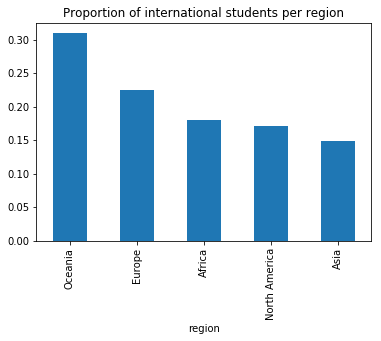

In [73]:
#Compute the ratio of international students per region
Region_intstudents = df_TH.groupby('region')['Students (inter.)'].sum()
Region_intstudents.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Proportion of international students per region')

## Observations : 
TODO
- The 
- 

### Merging the two datasets


In [ ]:
#df_TH.corr()
#take care of the int/double problems

The most important correlation with the TH rank is the number of international students. The ratio between FAC members and student is positive because the ratio is smaller for a smaller number of students per teacher. 

In [ ]:
#df_QS.corr()
#same here

The total number of students has no importantce in the QS ranking of the universities. However, the ratio of students over faculty members is highly negative. The number of faculty members and international students is ghly correlated with the ranking

## String matching algorithm

In [74]:
import string
import re
from difflib import SequenceMatcher as SM

# returns a version of the string cleaned of all the words/characters that
# do not give any information about the uni and can make it differ from its matching
def clean_string(elem, pattern):
    # replace - by space
    clean_elem = re.sub('[–-]', ' ', elem)
    # remove all that is inside parenthesis (if it's at least 5 characters)
    clean_elem = re.sub(r'\(.{0,5}?\)', '', clean_elem)
    # to lowercase
    clean_elem = clean_elem.lower()
    # remove accents
    clean_elem = re.sub('[\é\è]', 'e', clean_elem)
    clean_elem = re.sub('[ä]', 'a', clean_elem)
    clean_elem = re.sub('[ü]', 'u', clean_elem)
    clean_elem = re.sub('[ö]', 'o', clean_elem)
    # remove all punctuation
    clean_elem = "".join([c for c in clean_elem if c in string.ascii_letters or c in string.whitespace])
    # remove all linking words that are not useful to disinguish universities and can cause issues
    words = [x for x in clean_elem.split() if re.match(pattern, x) is None]
    clean_elem = ' '.join(words)
    # if a space remains at the end of the string, remove it. Also remove double spaces
    clean_elem = re.sub('[ ]{2,}', ' ', clean_elem)
    if clean_elem[-1] == ' ':
        clean_elem = clean_elem[:-1]
    return clean_elem

In [75]:
# creating the two lists and a dictionary for the matchings
a = df_QS.index.values.tolist()
b = df_TH.index.values.tolist()
matchings = dict()
for elem in a:
    matchings[elem] = None

# The words that we want to get rid of when we clean the name
pattern = r'[uU]niversit(y|at|aet|eit)|(\bof\b)|\b([tT]he)\b|(\bzu\b)|(\bat\b)'

# first match and extract all perfect matchings and names that match after cleaning them
for elemA in a:
    for elemB in b.copy():
        if elemA == elemB or clean_string(elemA, pattern) == clean_string(elemB, pattern):
            matchings[elemA] = elemB
            b.remove(elemB)
print(str(200 - len(b)) + ' elements out of 200 are matched')

141 elements out of 200 are matched


In [76]:
# fuzzy matching
# TODO document this section
threshold = 0.67
# loop over TH university names
for elemB in b.copy():
    max_ratio = 0
    best_match = None
    # check for the name in the QS directory that matches the best elemB if it exists
    for elemA in a:
        match_ratio = SM(None, clean_string(elemA, pattern), clean_string(elemB, pattern)).ratio()
        if match_ratio > threshold and match_ratio > max_ratio and matchings[elemA] is None:
            max_ratio = match_ratio
            best_match = elemA
    # if a match has been found save the index in matchings dictionary
    if best_match is not None:
        matchings[best_match] = elemB
        b.remove(elemB)
        #print(best_match + " -> " + elemB + " " + str(int(max_ratio*100)))

print(str(200 - len(b)) + ' elements out of 200 are matched')
        

153 elements out of 200 are matched


In [77]:
# remaining universities
for elemB in b:
    matchings[elemB] = None

In [78]:
for key in matchings:
    #print(key + ' -> ' + str(matchings[key]))
    print(key)
    print(str(matchings[key]))
    print()

New York University (NYU)
New York University

Imperial College London
Imperial College London

National Taiwan University (NTU)
National Taiwan University

Erasmus University Rotterdam
Erasmus University Rotterdam

Lomonosov Moscow State University
Lomonosov Moscow State University

Nagoya University
None

University of Geneva
University of Geneva

Scuola Superiore Sant’Anna
None

University of Michigan
University of Michigan

Instituto Tecnológico y de Estudios Superiores de Monterrey
None

Newcastle University
Newcastle University

Universidad de Chile
None

University of Southern California
University of Southern California

Harvard University
Harvard University

Korea University
None

École Normale Supérieure de Lyon
École Normale Supérieure de Lyon

Pennsylvania State University
Pennsylvania State University

University of Lausanne
University of Lausanne

University of California, Riverside
None

University of Minnesota
University of Minnesota

KAIST - Korea Advanced Institute of

At this point, we have a dictionnary *name A* -> *name B*. We will now use it to merge the dataframes

In [96]:
# merge the two dataframes with the matchings dictionnary
matchings_no_none = {k:v for k,v in matchings.items() if v is not None}
merged_df = df_QS.copy()
merged_df.index = merged_df.index.to_series().replace(matchings_no_none)
merged_df = pd.merge(merged_df, df_TH, left_index=True, right_index=True, how='outer', suffixes=['_QS', '_TH'])
merged_df

,QSrank,region_QS,country_QS,Faculty members (total)_QS,Faculty members (inter.),Students (total)_QS,Students (inter.)_QS,Students/Fac members_QS,International students ratio_QS,THrank,region_TH,country_TH,Faculty members (total)_TH,Students (total)_TH,Students (inter.)_TH,Students/Fac members_TH,International students ratio_TH
Aalto University,137,Europe,Finland,1257,370,12147,1831,9.663484,0.150737,190,Europe,Finland,630,12744,2548,20.2,0.20
Aarhus University,119,Europe,Denmark,2316,602,26226,3762,11.323834,0.143445,109,Europe,Denmark,1759,25167,3020,14.3,0.12
Albert-Ludwigs-Universitaet Freiburg,171,Europe,Germany,1966,413,23214,3897,11.807731,0.167873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alma Mater Studiorum - University of Bologna,188,Europe,Italy,2990,153,63399,4195,21.203679,0.0661682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,North America,United States,2212,44475,8450,20.1,0.19
Australian National University,20,Oceania,Australia,1600,927,14442,5551,9.026250,0.384365,48,Oceania,Australia,828,15986,5595,19.3,0.35
Autonomous University of Barcelona,195,Europe,Spain,2187,230,31986,3848,14.625514,0.120303,147,Europe,Spain,2504,32309,5169,12.9,0.16
Boston University,81,North America,United States,3157,379,25662,7041,8.128603,0.274375,70,North America,United States,2887,24833,6208,8.6,0.25
Brown University,53,North America,United States,1303,379,9251,1825,7.099770,0.197276,50,North America,United States,831,8898,1779,10.7,0.20
California Institute of Technology,4,North America,United States,953,350,2255,647,2.366212,0.286918,3,North America,United States,339,2209,596,6.5,0.27


A security check on the merge allows us to see that all universities have been merged and there is no duplicate

In [102]:
slc = ['QSrank', 'Faculty members (total)_QS' , 'Faculty members (inter.)' , 'Students (total)_QS' , 'Students (inter.)_QS' , 'International students ratio_QS', 'THrank' , 'Faculty members (total)_TH' , 'Students (total)_TH', 'Students (inter.)_TH' ]
merged_df[slc] = merged_df[slc].astype(float)
corr = merged_df.corr()
corr

,QSrank,Faculty members (total)_QS,Faculty members (inter.),Students (total)_QS,Students (inter.)_QS,Students/Fac members_QS,International students ratio_QS,THrank,Faculty members (total)_TH,Students (total)_TH,Students (inter.)_TH,Students/Fac members_TH,International students ratio_TH
QSrank,1.000000,-0.316445,-0.534572,-0.039802,-0.309609,0.373096,-0.369209,0.697391,-0.226556,-0.004579,-0.270970,0.219259,-0.299243
Faculty members (total)_QS,-0.316445,1.000000,0.590219,0.764622,0.471808,-0.266912,-0.069686,-0.356774,0.746743,0.598279,0.385475,-0.121546,-0.135557
Faculty members (inter.),-0.534572,0.590219,1.000000,0.307161,0.641201,-0.301559,0.424591,-0.362457,0.290084,0.272460,0.540014,-0.045076,0.321902
Students (total)_QS,-0.039802,0.764622,0.307161,1.000000,0.558612,0.331206,-0.171006,-0.133996,0.519936,0.982455,0.569430,0.354710,-0.288926
Students (inter.)_QS,-0.309609,0.471808,0.641201,0.558612,1.000000,0.196067,0.539897,-0.251172,0.171900,0.569988,0.924875,0.273487,0.414644
Students/Fac members_QS,0.373096,-0.266912,-0.301559,0.331206,0.196067,1.000000,-0.103782,0.175395,-0.157065,0.456961,0.262406,0.618586,-0.141009
International students ratio_QS,-0.369209,-0.069686,0.424591,-0.171006,0.539897,-0.103782,1.000000,-0.226291,-0.270263,-0.246716,0.534310,-0.023590,0.954476
THrank,0.697391,-0.356774,-0.362457,-0.133996,-0.251172,0.175395,-0.226291,1.000000,-0.248866,-0.151891,-0.328159,0.107456,-0.214197
Faculty members (total)_TH,-0.226556,0.746743,0.290084,0.519936,0.171900,-0.157065,-0.270263,-0.248866,1.000000,0.568346,0.275584,-0.431655,-0.216616
Students (total)_TH,-0.004579,0.598279,0.272460,0.982455,0.569988,0.456961,-0.246716,-0.151891,0.568346,1.000000,0.578362,0.257120,-0.289970


There is a big correlation between the two rankings.
QS seems to focus more on Fac members/Students ratio, TH is more balanced between the two ratios.

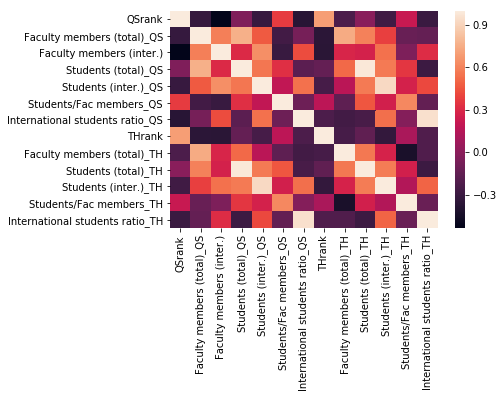

In [101]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [115]:
merged_df = merged_df.dropna(axis = 0)
merged_df['Our Ranking'] = stats.hmean([merged_df['QSrank'], merged_df['THrank']])
merged_df = merged_df.sort_values('Our Ranking' , ascending = True)
merged_df[['Our Ranking' , 'QSrank' , 'THrank']].head(20)

,Our Ranking,QSrank,THrank
Massachusetts Institute of Technology,1.666667,1.0,5.0
University of Oxford,1.714286,6.0,1.0
Stanford University,2.400000,2.0,3.0
University of Cambridge,2.857143,5.0,2.0
California Institute of Technology,3.428571,4.0,3.0
Harvard University,4.000000,3.0,6.0
Imperial College London,8.000000,8.0,8.0
University of Chicago,9.000000,9.0,9.0
Princeton University,9.100000,13.0,7.0
University College London,9.739130,7.0,16.0


In [112]:
merged_df.dropna(axis = 0)

,QSrank,region_QS,country_QS,Faculty members (total)_QS,Faculty members (inter.),Students (total)_QS,Students (inter.)_QS,Students/Fac members_QS,International students ratio_QS,THrank,region_TH,country_TH,Faculty members (total)_TH,Students (total)_TH,Students (inter.)_TH,Students/Fac members_TH,International students ratio_TH
Aalto University,137.0,Europe,Finland,1257.0,370.0,12147.0,1831.0,9.663484,0.150737,190.0,Europe,Finland,630.0,12744.0,2548.0,20.2,0.20
Aarhus University,119.0,Europe,Denmark,2316.0,602.0,26226.0,3762.0,11.323834,0.143445,109.0,Europe,Denmark,1759.0,25167.0,3020.0,14.3,0.12
Australian National University,20.0,Oceania,Australia,1600.0,927.0,14442.0,5551.0,9.026250,0.384365,48.0,Oceania,Australia,828.0,15986.0,5595.0,19.3,0.35
Autonomous University of Barcelona,195.0,Europe,Spain,2187.0,230.0,31986.0,3848.0,14.625514,0.120303,147.0,Europe,Spain,2504.0,32309.0,5169.0,12.9,0.16
Boston University,81.0,North America,United States,3157.0,379.0,25662.0,7041.0,8.128603,0.274375,70.0,North America,United States,2887.0,24833.0,6208.0,8.6,0.25
Brown University,53.0,North America,United States,1303.0,379.0,9251.0,1825.0,7.099770,0.197276,50.0,North America,United States,831.0,8898.0,1779.0,10.7,0.20
California Institute of Technology,4.0,North America,United States,953.0,350.0,2255.0,647.0,2.366212,0.286918,3.0,North America,United States,339.0,2209.0,596.0,6.5,0.27
Cardiff University,137.0,Europe,United Kingdom,2755.0,705.0,24565.0,6090.0,8.916515,0.247914,162.0,Europe,United Kingdom,1791.0,24186.0,6288.0,13.5,0.26
Carnegie Mellon University,47.0,North America,United States,1342.0,425.0,13356.0,6385.0,9.952310,0.478062,24.0,North America,United States,938.0,12676.0,5704.0,13.5,0.45
Chinese University of Hong Kong,46.0,Asia,Hong Kong,2208.0,1074.0,18037.0,4824.0,8.168931,0.267450,58.0,Asia,Hong Kong,1044.0,18072.0,5602.0,17.3,0.31
